Write a program using tensorflow to calculate : 
    $$y=mx+c$$

### Part 1

1. Read 2 arrays x,y containing floating point values
2. Calculate mean of x & y
3. Calculate variance for x
    $$variance(x)=sum((x-mean(x))^2)$$
4. Calculate covariance of x & y
    $$covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))$$
5. Calculate value of m
    $$m = covariance(x,y)/variance(x)$$
6. Calculate value of c
    $$c = mean(y) -m* mean(x)$$
    

### Part 2

1. Plot graph for actual values against predicted value
2. Calculate root mean square error.

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

with tf.name_scope("var"):
    with tf.name_scope("MEAN_x"):
        a1=tf.constant([11.0, 13.0, 26.0,34.0,39.0],shape=[1,5],name='a1')
        b1=tf.constant([34.0, 39.0, 42.0,54.0,62.0],shape=[1,5],name='b1')
        x=tf.reduce_mean(a1)
        sess=tf.Session()
    print(sess.run(x))
    with tf.name_scope("MEAN_Y"):
        y=tf.reduce_mean(b1)
        sess=tf.Session()
        print(sess.run(y))
d=tf.subtract(a1,x)
sess=tf.Session()
print(sess.run(d))
       
e=tf.square(d)
var=tf.reduce_sum(e)
sess=tf.Session()
print(sess.run(var))    




24.6
46.2
[[-13.60000038 -11.60000038   1.39999962   9.39999962  14.39999962]]
617.2


In [6]:

with tf.name_scope("Co-VAriance"):
    g=tf.subtract(b1,y)
    sess=tf.Session()
    g=tf.multiply(d,g)
    h=tf.reduce_sum(g)
    print(sess.run(h))    

with tf.name_scope("slope_value"):
    j=tf.divide(h,var)
    print(sess.run(j))

with tf.name_scope("constant_value"):
    i=tf.multiply(j,x)
    k=tf.subtract(y,i)
    print(sess.run(k))  
    
with tf.name_scope("root_mean_square_error"):
    l=tf.subtract(b1,y)
    m=tf.multiply(l, l)
    n=tf.reduce_sum(m)
    o=tf.divide(n, 5,)
    p=tf.sqrt(o)
    print (sess.run(p))
    

with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp/tboard/output3", sess.graph)
    print(sess.run(k))
    writer.close()


544.4
0.882048
24.5016
10.284
24.5016


In [7]:

import numpy 

with tf.Session() as sess:
    x_val=sess.run(a1)
    y_val=sess.run(b1)
X = numpy.asarray(x_val)
Y = numpy.asarray(y_val)


x_values_for_PREDICTION = tf.constant([16.0,28.0, 33.0, 41.0, 59.0])
with tf.Session() as sess:
    x3=sess.run(x_values_for_PREDICTION)
x_values_for_PREDICTION_1=numpy.asarray(x3)

y_after_prediction=[0]*5
    
with tf.Session() as sess:
        for i in range(len(sess.run(x_values_for_PREDICTION))):
            tmp = sess.run(x_values_for_PREDICTION[i])
            tmp1=tf.multiply(tmp,j)
            answer = tf.add(tmp1,k)
            y_after_prediction[i]=sess.run(answer)
print(y_after_prediction)


[38.614388, 49.198963, 53.609203, 60.665588, 76.54245]


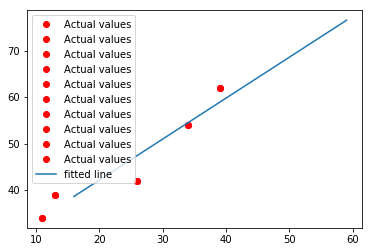

In [9]:

plt.plot(X,Y, 'ro', label='Actual values')
plt.plot(x_values_for_PREDICTION_1, y_after_prediction, label='fitted line')
plt.legend()
plt.show()